In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn import model_selection
from sklearn import datasets

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X=data.data
y=data.target

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# PCA - Principal Component Analysis

### Standardizovanje podataka

In [ ]:
def mean(x): # np.mean(X, axis = 0)
  return sum(x)/len(x)

In [ ]:
def std(x): # np.std(X, axis = 0)
  return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

In [ ]:
def standardize_data(X):
    return (X - mean(X))/std(X)

In [ ]:
X_std = standardize_data(X)

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [ ]:
(X_std == X_standard).all()

True

### Matrica kovarijacije

In [ ]:
def covariance_matrix(X): # np.cov(X_std.T)
  return X.T.dot(X)/(X.shape[0]-1)

In [ ]:
cov_matrix = covariance_matrix(X_std)

In [ ]:
X.shape

(569, 30)

In [ ]:
X.T.shape

(30, 569)

In [ ]:
cov_matrix.shape

(30, 30)

### Izracunavanje sopstvenih vrednosti i sopstvenih vektora matrice kovarijacije

In [ ]:
import numpy.linalg as la

In [ ]:
eigen_values,eigen_vectors=la.eig(cov_matrix)
max_abs_idx = np.argmax(np.abs(eigen_vectors), axis=0)
signs = np.sign(eigen_vectors[max_abs_idx, range(eigen_vectors.shape[0])])
eigen_vectors = eigen_vectors*signs[np.newaxis,:]
eigen_vectors = eigen_vectors.T

In [ ]:
print('Eigenvalues \n', eigen_values)
print('Eigenvectors \n', eigen_vectors)

Eigenvalues 
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
Eigenvectors 
 [[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-

In [ ]:
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[i,:]) for i in range(len(eigen_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

### Izracunavanje udela objasnjene varijanse

In [ ]:
eig_vals_total = sum(eigen_values)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

Explained variance: [4.427e+01 1.897e+01 9.390e+00 6.600e+00 5.500e+00 4.020e+00 2.250e+00
 1.590e+00 1.390e+00 1.170e+00 9.800e-01 8.700e-01 8.000e-01 5.200e-01
 3.100e-01 2.700e-01 2.000e-01 1.800e-01 1.600e-01 1.000e-01 1.000e-01
 9.000e-02 8.000e-02 6.000e-02 5.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00]
Cumulative explained variance: [44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15 96.13 97.
 97.8  98.32 98.63 98.9  99.1  99.28 99.44 99.54 99.64 99.73 99.81 99.87
 99.92 99.95 99.97 99.98 99.98 99.98]


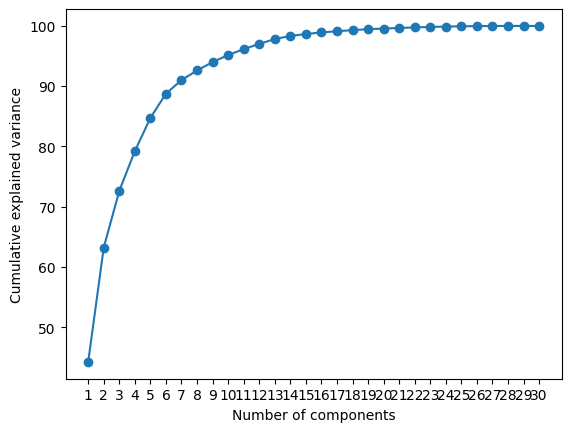

In [ ]:
n_features = len(data.feature_names)
plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

### Matrica projekcije

In [ ]:
k = 15
W = eig_vecs_sorted[:k, :]

print(W.shape)

(15, 30)


In [ ]:
X_proj=X_std.dot(W.T)

## SVD dekompozicija

In [ ]:
## TODO: dodati scikit-learn kod za pca

### Dekomponovanje matrice podataka

In [ ]:
U,s,Vt = la.svd(X)

### Iscrtavanje udela varijanse po komponentama

In [ ]:
S = np.zeros_like(X)
for i in range(len(s)):
  S[i,i]=s[i]

In [ ]:
total_variance=sum(s)
explained_variance_svd = [s[i]/total_variance*100 for i in range(len(s))]

In [ ]:
np.cumsum(explained_variance_svd)

array([ 87.98665557,  95.07568879,  97.5920232 ,  99.17854747,
        99.61622286,  99.77995662,  99.87213821,  99.9137195 ,
        99.94182116,  99.96202716,  99.97467477,  99.98097849,
        99.98500585,  99.9883475 ,  99.99082849,  99.99259654,
        99.99395339,  99.99527215,  99.99620963,  99.99708846,
        99.99769072,  99.99826725,  99.99866992,  99.99903324,
        99.99931504,  99.99955585,  99.99971724,  99.99984432,
        99.99994076, 100.        ])

In [ ]:
k = 4

In [ ]:
S=S[:,:k]
Vt=Vt[:k,:]

In [ ]:
B = U.dot(S.dot(Vt))

In [ ]:
Vt.shape

(4, 30)

In [ ]:
S.shape

(569, 4)

### Matrice transformacije

$X = U.S.V^T $

$X.V = U.S.V^T.V $

$V^T.V = I$

$X.V = U.S$

In [ ]:
T1 = U.dot(S)

In [ ]:
T1.shape

(569, 4)

In [ ]:
T2 = X.dot(Vt.T)

In [ ]:
T2.shape

(569, 4)

In [ ]:
T1

array([[-2241.97427647,   347.71556015,   -27.53741942,   -59.80149797],
       [-2372.40840267,    56.90166991,    23.86316187,    48.56406425],
       [-2101.8402797 ,    11.94762737,    30.41138602,    12.07124761],
       ...,
       [-1424.53280954,   -55.0217124 ,    -3.5794351 ,     5.71453172],
       [-2231.65579282,    19.99439854,     3.31619182,    11.27048277],
       [ -331.69302638,    -5.29733966,   -39.12136435,   -31.5545363 ]])

In [ ]:
T2

array([[-2241.97427647,   347.71556015,   -27.53741942,   -59.80149797],
       [-2372.40840267,    56.90166991,    23.86316187,    48.56406425],
       [-2101.8402797 ,    11.94762737,    30.41138602,    12.07124761],
       ...,
       [-1424.53280954,   -55.0217124 ,    -3.5794351 ,     5.71453172],
       [-2231.65579282,    19.99439854,     3.31619182,    11.27048277],
       [ -331.69302638,    -5.29733966,   -39.12136435,   -31.5545363 ]])

In [ ]:
((T1-T2)<0.0001).all()

True

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD()

In [ ]:
X_svd = svd.fit_transform(X)
X_svd

array([[2241.97427647, -347.71556015],
       [2372.40840267,  -56.90166991],
       [2101.8402797 ,  -11.94762737],
       ...,
       [1424.53280954,   55.0217124 ],
       [2231.65579282,  -19.99439854],
       [ 331.69302638,    5.29733966]])

In [ ]:
from sklearn.utils.extmath import randomized_svd

In [ ]:
X_svd_r = randomized_svd(X, n_components=2, random_state=0)

In [ ]:
[U, s, V_t] = X_svd_r

In [ ]:
X_svd_r

(array([[ 0.07282342,  0.14018269],
        [ 0.07706016,  0.0229401 ],
        [ 0.06827161,  0.00481673],
        ...,
        [ 0.04627143, -0.02218219],
        [ 0.07248826,  0.00806081],
        [ 0.010774  , -0.00213564]]),
 array([30786.44462784,  2480.44578339]),
 array([[ 1.07417853e-02,  1.34045777e-02,  7.04506088e-02,
          5.72522445e-01,  6.51751678e-05,  8.01017182e-05,
          8.07639302e-05,  4.51934799e-05,  1.22298430e-04,
          4.10463505e-05,  3.52395083e-04,  7.91756415e-04,
          2.49763979e-03,  4.15710660e-02,  4.46726431e-06,
          1.84034785e-05,  2.35606720e-05,  8.71328141e-06,
          1.33301479e-05,  2.50009455e-06,  1.27106222e-02,
          1.78787301e-02,  8.44072509e-02,  8.10936848e-01,
          8.96729192e-05,  1.95800247e-04,  2.25664038e-04,
          9.56995686e-05,  1.97533332e-04,  5.62166955e-05],
        [-3.10857421e-02, -4.83124253e-02, -1.97364828e-01,
         -7.70224130e-01, -2.62097172e-04, -1.75341873e-04,
      